In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [39]:
shampoo_sales_df = pd.read_csv('/kaggle/input/shampoo-saled-dataset/shampoo_sales.csv')

In [40]:
shampoo_sales_df.head(20)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [41]:
shampoo_sales_df.shape

(36, 2)

In [43]:
# Split 'Month' column into 'Month' and 'Day'
shampoo_sales_df[['Year', 'Month']] = shampoo_sales_df['Month'].str.split('-', expand=True)

# Convert 'Month' and 'Dayshampoo_sales_dfcolumns to integer type
shampoo_sales_df['Year'] = shampoo_sales_df['Year'].astype(int)
shampoo_sales_df['Month'] = shampoo_sales_df['Month'].astype(int)

print(shampoo_sales_df)

    Month  Sales  Year
0       1  266.0     1
1       2  145.9     1
2       3  183.1     1
3       4  119.3     1
4       5  180.3     1
5       6  168.5     1
6       7  231.8     1
7       8  224.5     1
8       9  192.8     1
9      10  122.9     1
10     11  336.5     1
11     12  185.9     1
12      1  194.3     2
13      2  149.5     2
14      3  210.1     2
15      4  273.3     2
16      5  191.4     2
17      6  287.0     2
18      7  226.0     2
19      8  303.6     2
20      9  289.9     2
21     10  421.6     2
22     11  264.5     2
23     12  342.3     2
24      1  339.7     3
25      2  440.4     3
26      3  315.9     3
27      4  439.3     3
28      5  401.3     3
29      6  437.4     3
30      7  575.5     3
31      8  407.6     3
32      9  682.0     3
33     10  475.3     3
34     11  581.3     3
35     12  646.9     3


In [44]:
# Check for null values in the DataFrame
null_values = shampoo_sales_df.isnull().sum()
print(null_values)

Month    0
Sales    0
Year     0
dtype: int64


In [45]:
# Calculate statistical measures

# Mean
mean_sales = shampoo_sales_df['Sales'].mean()

# Median
median_sales = shampoo_sales_df['Sales'].median()

# Mode
mode_sales = shampoo_sales_df['Sales'].mode()[0]

# Variance
variance_sales = shampoo_sales_df['Sales'].var()

# Standard Deviation
std_sales = shampoo_sales_df['Sales'].std()

# Interquartile Range (IQR)
Q1 = shampoo_sales_df['Sales'].quantile(0.25)
Q3 = shampoo_sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Dispersion (Range)
dispersion_sales = shampoo_sales_df['Sales'].max() - shampoo_sales_df['Sales'].min()

# Measure of Skewness and Kurtosis
skewness_sales = shampoo_sales_df['Sales'].skew()
kurtosis_sales = shampoo_sales_df['Sales'].kurt()

results = {
    'Mean': mean_sales,
    'Median': median_sales,
    'Mode': mode_sales,
    'Variance': variance_sales,
    'Standard Deviation': std_sales,
    'Interquartile Range': IQR,
    'Q3': Q3,
    'Dispersion (Range)': dispersion_sales,
    'Skewness': skewness_sales,
    'Kurtosis': kurtosis_sales
}

In [46]:
results

{'Mean': 312.59999999999997,
 'Median': 280.15,
 'Mode': 119.3,
 'Variance': 22182.278857142854,
 'Standard Deviation': 148.93716412347476,
 'Interquartile Range': 218.65,
 'Q3': 411.1,
 'Dispersion (Range)': 562.7,
 'Skewness': 0.8945388528534595,
 'Kurtosis': 0.11622821118738624}

Q1 (25th Percentile): 192.45000000000002
Q2 (Median): 280.15
Q3 (75th Percentile): 411.1
Outliers: 0


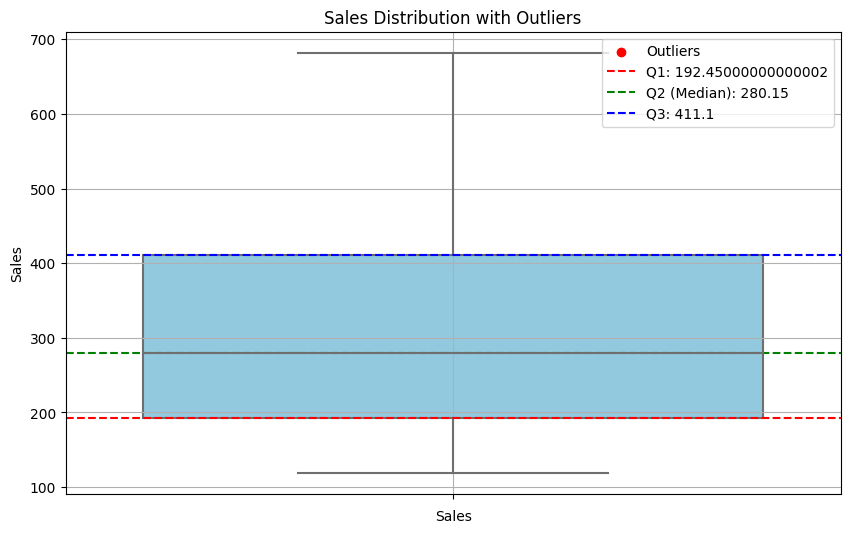

In [51]:
# Calculate Quartiles
Q1 = shampoo_sales_df['Sales'].quantile(0.25)
Q2 = shampoo_sales_df['Sales'].median()  
Q3 = shampoo_sales_df['Sales'].quantile(0.75)


print(f"Q1 (25th Percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th Percentile): {Q3}")

# Calculate Quartiles and IQR
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find the outliers
outliers = shampoo_sales_df[(shampoo_sales_df['Sales'] < lower_bound) | (shampoo_sales_df['Sales'] > upper_bound)]
print("Outliers:", len(outliers))


# Plotting the Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=shampoo_sales_df['Sales'], color='skyblue')
plt.scatter(outliers.index, outliers['Sales'], color='red', label='Outliers', zorder=5)
plt.axhline(Q1, color='r', linestyle='--', label=f'Q1: {Q1}')
plt.axhline(Q2, color='g', linestyle='--', label=f'Q2 (Median): {Q2}')
plt.axhline(Q3, color='b', linestyle='--', label=f'Q3: {Q3}')
plt.title('Sales Distribution with Outliers')
plt.xlabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

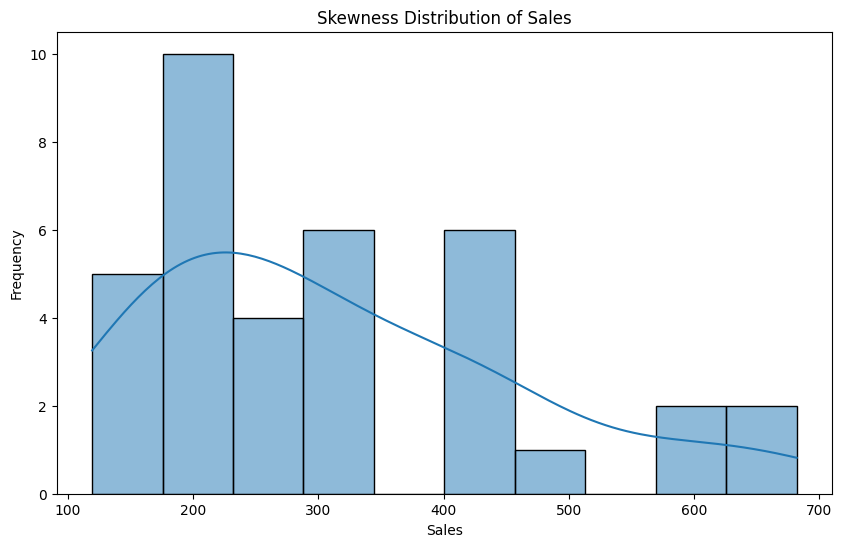

Correlation Matrix:
               Month     Sales          Year
Month  1.000000e+00  0.345532  8.753182e-18
Sales  3.455320e-01  1.000000  7.842035e-01
Year   8.753182e-18  0.784204  1.000000e+00

Cosine Similarity:
 [[1.         0.9486833  0.89442719 ... 0.8804711  0.86824314 0.85749293]
 [0.9486833  1.         0.98994949 ... 0.98521175 0.98058068 0.97618706]
 [0.89442719 0.98994949 1.         ... 0.99954118 0.99846035 0.99705449]
 ...
 [0.8804711  0.98521175 0.99954118 ... 1.         0.99968238 0.99892009]
 [0.86824314 0.98058068 0.99846035 ... 0.99968238 1.         0.99977373]
 [0.85749293 0.97618706 0.99705449 ... 0.99892009 0.99977373 1.        ]]

Dot Product of Sales and Days: 79454.40000000001

Month with Minimum Sales:
 Month      4.0
Sales    119.3
Year       1.0
Name: 3, dtype: float64

Month with Maximum Sales:
 Month      9.0
Sales    682.0
Year       3.0
Name: 32, dtype: float64

Average Sales per Year:
 Year
1    196.458333
2    262.791667
3    478.550000
Name: Sales, d

In [53]:
# Cosine similarity between months and years
cosine_sim = cosine_similarity(shampoo_sales_df[['Year', 'Month']])
dot_product = np.dot(shampoo_sales_df['Sales'], shampoo_sales_df['Month'])

# Min and Max Sales by year
min_sales_year = shampoo_sales_df.loc[shampoo_sales_df['Sales'].idxmin()]
max_sales_year = shampoo_sales_df.loc[shampoo_sales_df['Sales'].idxmax()]

# Average Sales per year
avg_sales_per_year = shampoo_sales_df.groupby('Year')['Sales'].mean()

# Max and Min Sales by month
max_sales_per_month = shampoo_sales_df.loc[shampoo_sales_df.groupby('Year')['Sales'].idxmax()]
min_sales_per_month = shampoo_sales_df.loc[shampoo_sales_df.groupby('Year')['Sales'].idxmin()]

# Skewness Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(shampoo_sales_df['Sales'], kde=True, bins=10)
plt.title('Skewness Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

print("\nCosine Similarity:\n", cosine_sim)
print("\nDot Product of Sales and Days:", dot_product)
print("\nMonth with Minimum Sales:\n", min_sales_year)
print("\nMonth with Maximum Sales:\n", max_sales_year)
print("\nAverage Sales per Year:\n", avg_sales_per_year)
print("\nDay with Maximum Sales in Each Year:\n", max_sales_per_month)
print("\nDay with Minimum Sales in Each Year:\n", min_sales_per_month)

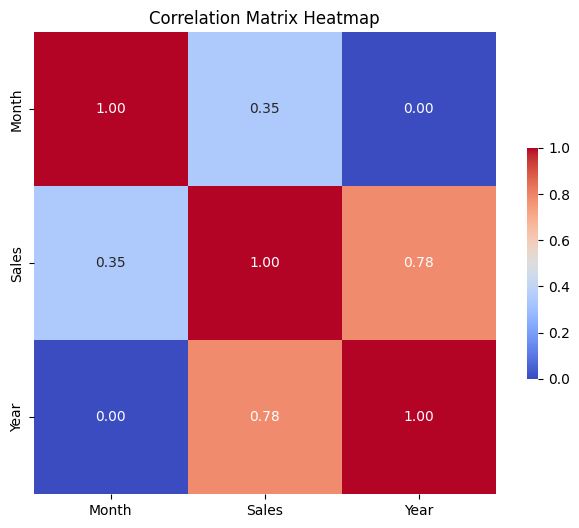

In [55]:
# Correlation
correlation = shampoo_sales_df.corr()

# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()

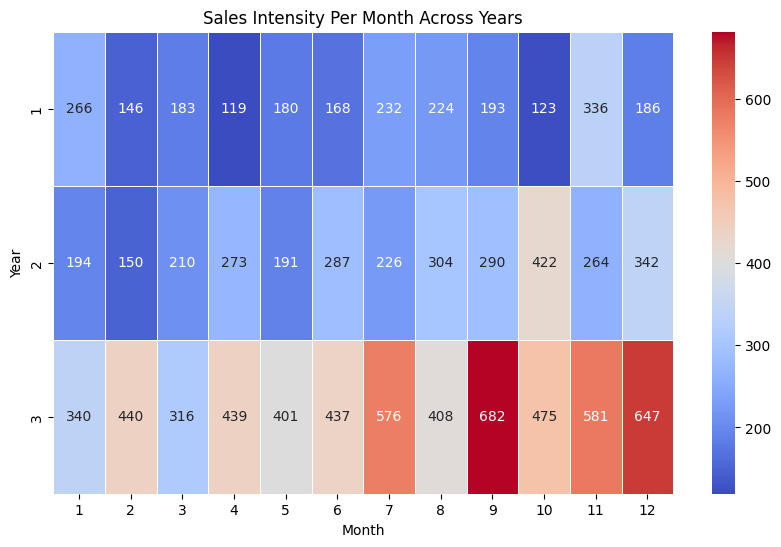

In [72]:
# Heatmap of Sales (Seasonal Pattern Detection)
pivot_table = shampoo_sales_df.pivot(index='Year', columns='Month', values='Sales')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Sales Intensity Per Month Across Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

<Figure size 1400x1000 with 0 Axes>

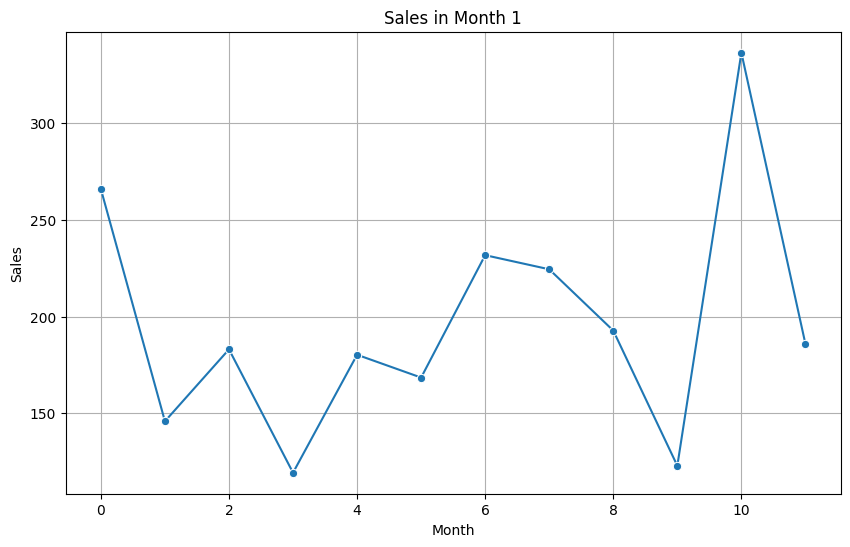

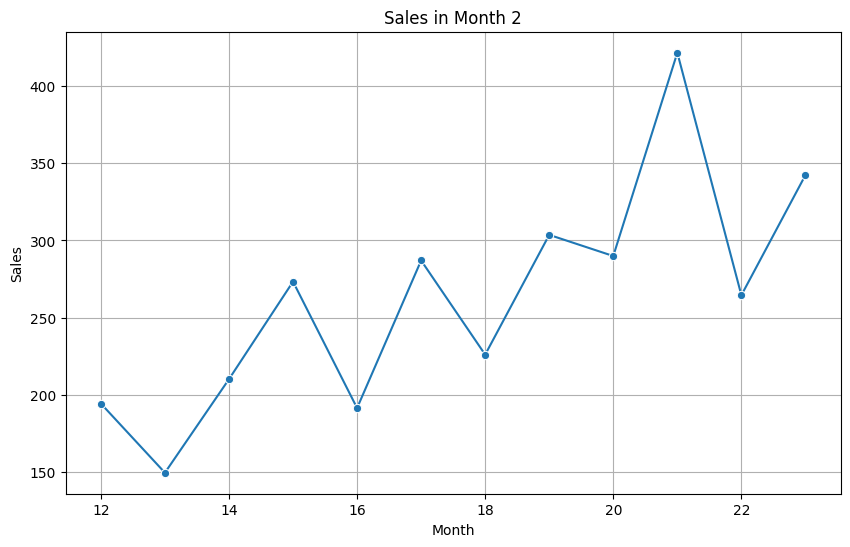

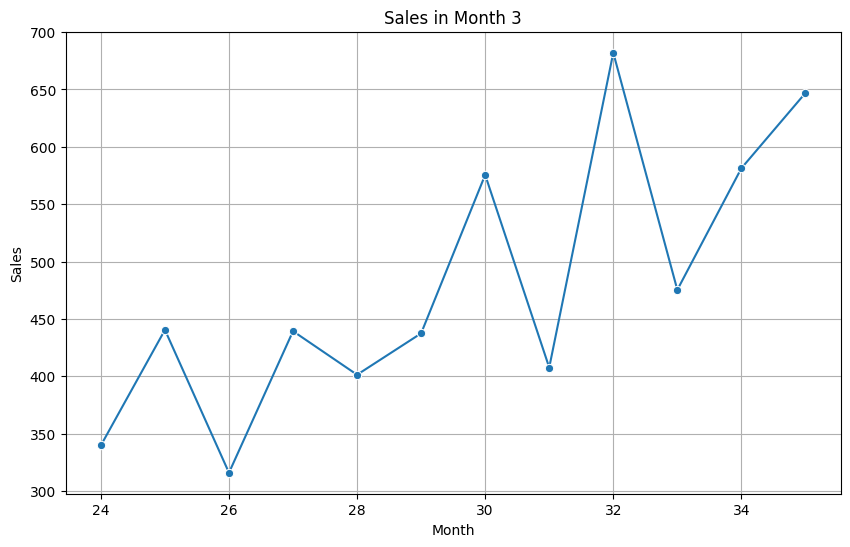

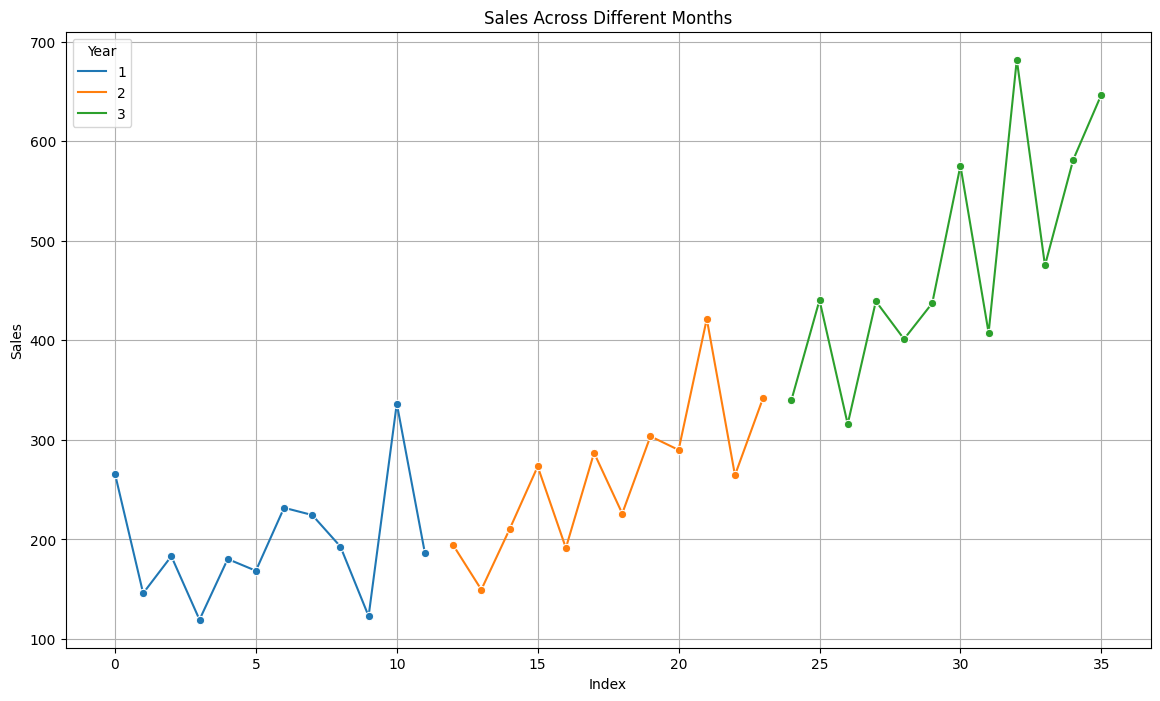

In [56]:
# Plot Sales for each year
plt.figure(figsize=(14, 10))

for month in sorted(shampoo_sales_df['Year'].unique()):
    plt.figure(figsize=(10, 6))
    month_data = shampoo_sales_df[shampoo_sales_df['Year'] == month]
    sns.lineplot(x=month_data.index, y='Sales', data=month_data, marker='o')
    plt.title(f'Sales in Month {month}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

# Combined plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=shampoo_sales_df.index, y='Sales', hue='Year', data=shampoo_sales_df, marker='o', palette='tab10')
plt.title('Sales Across Different Months')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Year')
plt.show()

(0.0, 702.0)

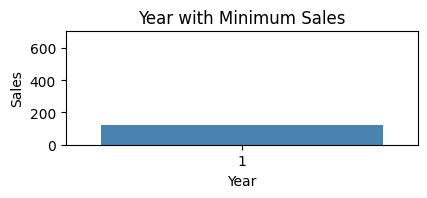

In [65]:
plt.subplot(3, 2, 1)
sns.barplot(x='Year', y='Sales', data=min_sales_info, palette='Blues_d')
plt.title('Year with Minimum Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.ylim(0, shampoo_sales_df['Sales'].max() + 20)

(0.0, 702.0)

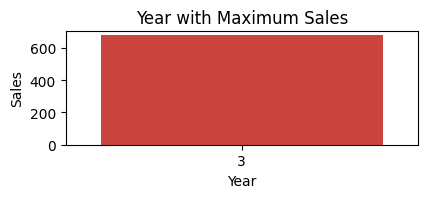

In [66]:
plt.subplot(3, 2, 2)
sns.barplot(x='Year', y='Sales', data=max_sales_info, palette='Reds_d')
plt.title('Year with Maximum Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.ylim(0, shampoo_sales_df['Sales'].max() + 20)

(0.0, 702.0)

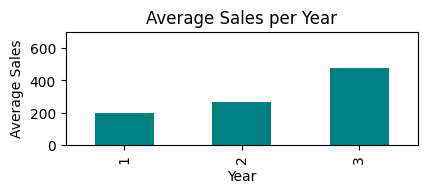

In [67]:
plt.subplot(3, 2, 3)
average_sales_per_month.plot(kind='bar', color='teal')
plt.title('Average Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.ylim(0, shampoo_sales_df['Sales'].max() + 20)

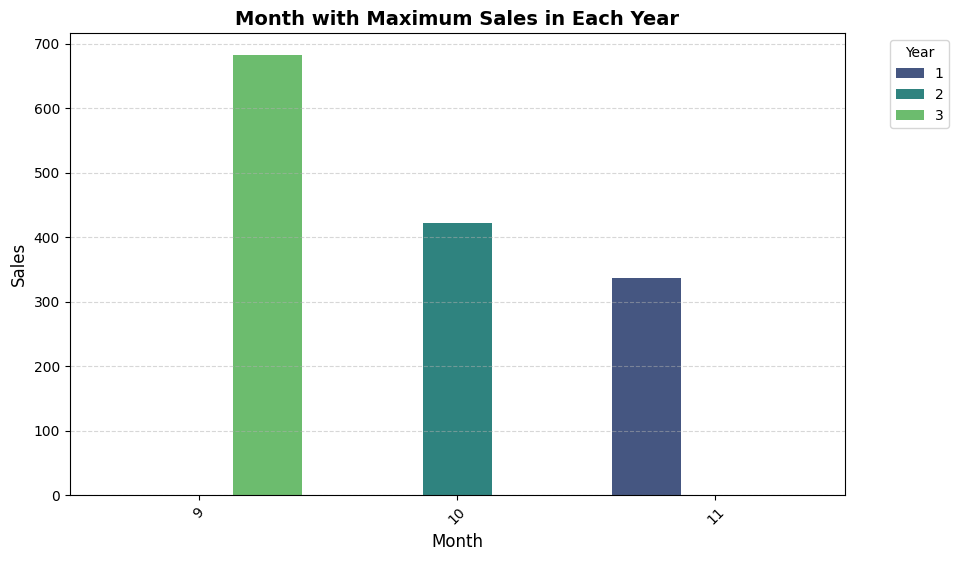

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Year', data=day_max_sales, palette='viridis')

plt.title('Month with Maximum Sales in Each Year', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


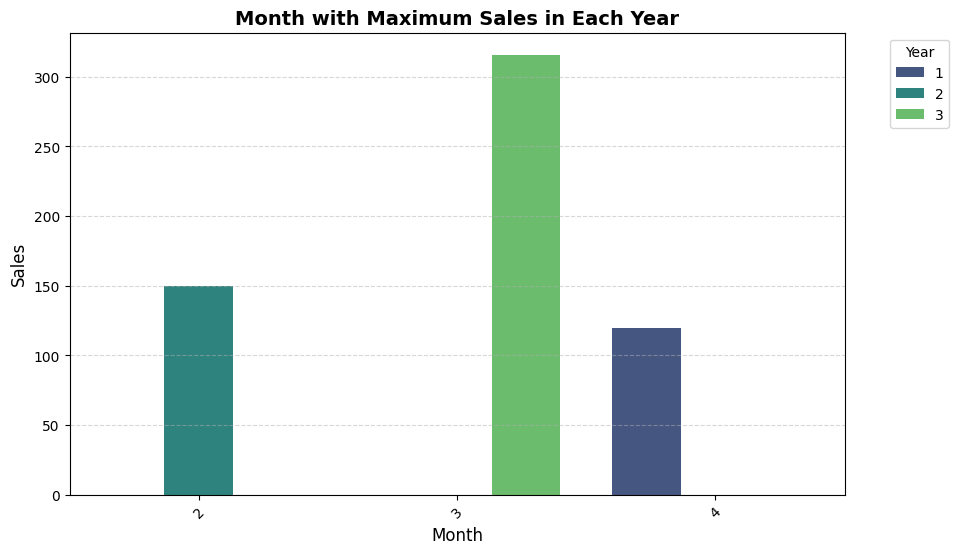

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Year', data=day_min_sales, palette='viridis')

plt.title('Month with Maximum Sales in Each Year', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


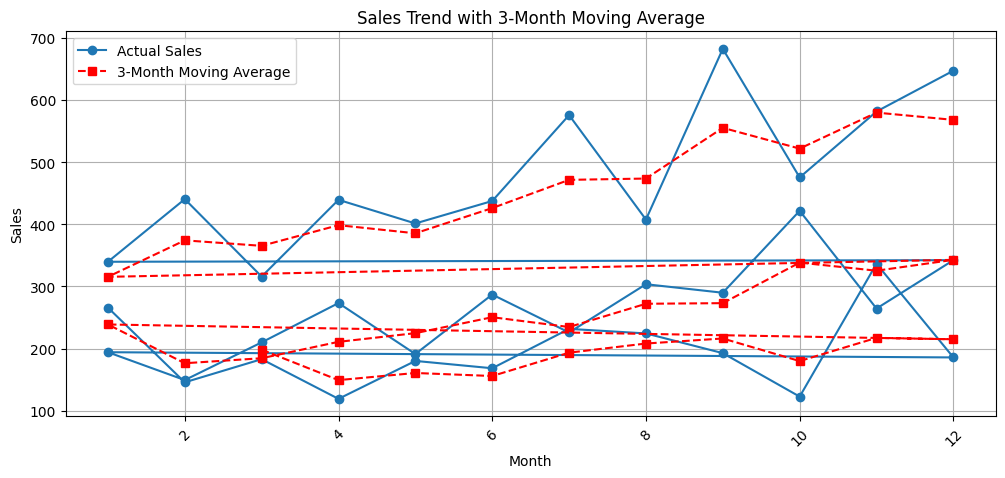

In [74]:
# 3 month moving average
shampoo_sales_df['Sales_MA'] = shampoo_sales_df['Sales'].rolling(window=3).mean()  
plt.figure(figsize=(12, 5))
plt.plot(shampoo_sales_df['Month'], shampoo_sales_df['Sales'], marker='o', label='Actual Sales')
plt.plot(shampoo_sales_df['Month'], shampoo_sales_df['Sales_MA'], marker='s', linestyle='dashed', label='3-Month Moving Average', color='red')
plt.title('Sales Trend with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 1200x500 with 0 Axes>

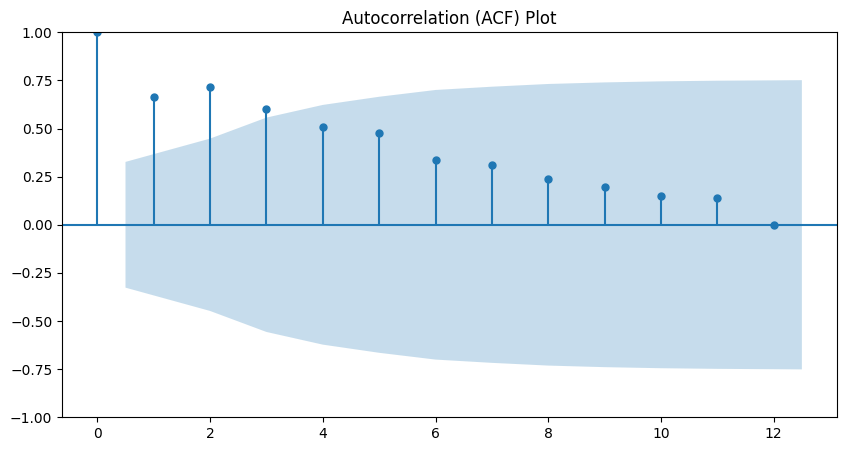

<Figure size 1200x500 with 0 Axes>

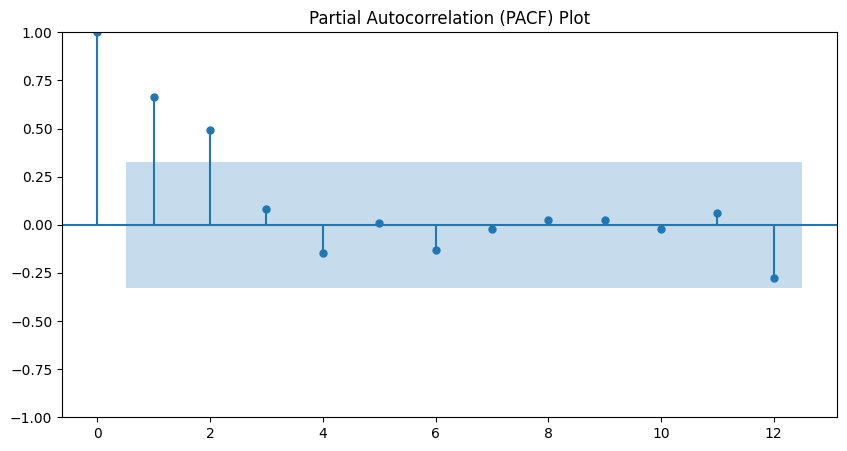

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(shampoo_sales_df['Sales'], lags=12)
plt.title('Autocorrelation (ACF) Plot')
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(shampoo_sales_df['Sales'], lags=12)
plt.title('Partial Autocorrelation (PACF) Plot')
plt.show()
